In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40,40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

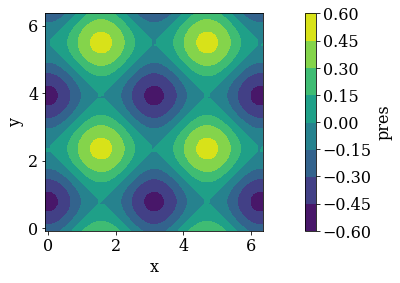

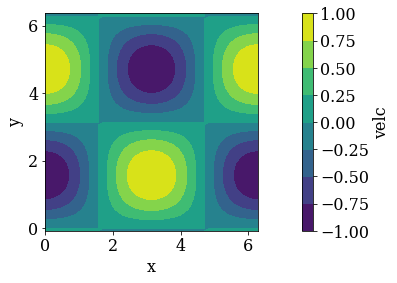

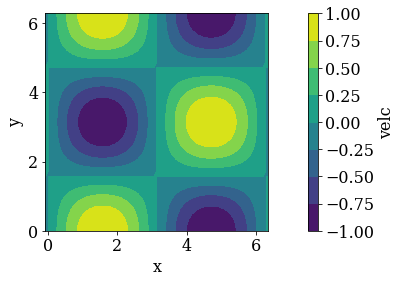

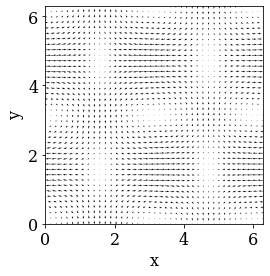

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
### Step 1 ###    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step1')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step1')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step1')
    
    
### Step 2 ###    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step2')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step2')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step2')
    
### Step 3 ###    
    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step3')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step3')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step3')
    
    
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()
    

'''
ins_vars = ['velc', 'hvar', 'divv', 'pres']
constants = [[0,1/3,1/3],[-5/9,15/16,5/12],[-153/128,8/15,1/4]]

while scalars.variable['time'] <= scalars.variable['tmax']:

    for cnst1, cnst2, cnst3 in constants:

        # Update the time-dependent boundary condition value
        simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
        
        # Predictor Step
        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor', cnst1, cnst2, cnst3)
        
        # Divergence Step
        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence', cnst1, cnst2, cnst3)
        
        # Solve the pressure Poisson equation 
        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                           maxiter=10000, tol=1e-9)
        # Corrector Step
        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector', cnst1, cnst2, cnst3)
        
        # Display stats
        if scalars.variable['nstep'] % 10 == 0:
            flowx.io.display_stats(scalars)   
        
        scalars.advance()
'''

------------ Time = 0.0 ---------------
Number of poisson iterations    : 544
Final poisson residual : 9.955722350194011e-10
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.4829470647135532, -1.4980916885389683
Max, Min, DIV : 12.756488116691001, -12.756420416161152


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : 1482
Final poisson residual : 9.945359343897313e-10
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : 1.473826003080035, -1.489347886309186
Max, Min, DIV : 12.69137021165906, -12.690565811728337


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : 1475
Final poisson residual : 9.977991615998699e-10
Max, Min, U   : 0.9578276459586815, -0.9578276459586814
Max, Min, V   : 0.9578276459586814, -0.9578276459586815
Max, Min, P   : 1.4428204076880

------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : 1339
Final poisson residual : 9.97471798757716e-10
Max, Min, U   : 0.6293376087080936, -0.6293376087080935
Max, Min, V   : 0.6293376087080935, -0.6293376087080936
Max, Min, P   : 0.9461690386881986, -0.9503662270740467
Max, Min, DIV : 8.142535213644358, -8.143744173602057


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : 1333
Final poisson residual : 9.945135360370753e-10
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.6168758891177192
Max, Min, P   : 0.927430246233435, -0.9313413798463082
Max, Min, DIV : 7.981153648708938, -7.982368138101436


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : 1326
Final poisson residual : 9.976988882546415e-10
Max, Min, U   : 0.6046609281081134, -0.6046609281081134
Max, Min, V   : 0.6046609281081134, -0.6046609281081134
Max, Min, P   : 

------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : 1190
Final poisson residual : 9.967044993884057e-10
Max, Min, U   : 0.3972905398798565, -0.3972905398798565
Max, Min, V   : 0.3972905398798565, -0.3972905398798565
Max, Min, P   : 0.5973560254638148, -0.597592991594901
Max, Min, DIV : 5.139689710961987, -5.140510280020771


------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : 1183
Final poisson residual : 9.998748763727603e-10
Max, Min, U   : 0.3894236601075599, -0.38942366010755985
Max, Min, V   : 0.38942366010755985, -0.3894236601075599
Max, Min, P   : 0.5855325204031753, -0.5856854696218161
Max, Min, DIV : 5.037936976838492, -5.038735304916719


------------ Time = 0.48000000000000037 ---------------
Number of poisson iterations    : 1177
Final poisson residual : 9.96876486998559e-10
Max, Min, U   : 0.381712554991691, -0.381712554991691
Max, Min, V   : 0.381712554991691, -0.381712554991691
Max, Min, P   : 0.

------------ Time = 0.6900000000000005 ---------------
Number of poisson iterations    : 1041
Final poisson residual : 9.956589730285328e-10
Max, Min, U   : 0.2509539249863623, -0.2509539249863555
Max, Min, V   : 0.2509539249863607, -0.250953924986357
Max, Min, P   : 0.37718684041587164, -0.37718149299206055
Max, Min, DIV : 3.2451367790680696, -3.2455475970020324


------------ Time = 0.7000000000000005 ---------------
Number of poisson iterations    : 1034
Final poisson residual : 9.98822476434845e-10
Max, Min, U   : 0.24599320740354189, -0.24599320740353522
Max, Min, V   : 0.24599320740354036, -0.24599320740353667
Max, Min, P   : 0.3697221374150305, -0.36971524669305245
Max, Min, DIV : 3.180909822022973, -3.1813077297557224


------------ Time = 0.7100000000000005 ---------------
Number of poisson iterations    : 1028
Final poisson residual : 9.958442243898137e-10
Max, Min, U   : 0.24113058695404238, -0.24113058695403583
Max, Min, V   : 0.24113058695404094, -0.24113058695403727
Max, 

------------ Time = 0.9200000000000007 ---------------
Number of poisson iterations    : 892
Final poisson residual : 9.955217599815178e-10
Max, Min, U   : 0.15855614392387468, -0.15855614392387068
Max, Min, V   : 0.1585561439238742, -0.15855614392387116
Max, Min, P   : 0.2381771937712537, -0.2381571713960697
Max, Min, DIV : 2.0491369077596384, -2.049330077842082


------------ Time = 0.9300000000000007 ---------------
Number of poisson iterations    : 885
Final poisson residual : 9.988363762492896e-10
Max, Min, U   : 0.15542256590252423, -0.15542256590252032
Max, Min, V   : 0.1554225659025238, -0.15542256590252077
Max, Min, P   : 0.23346397308386935, -0.23344392886634843
Max, Min, DIV : 2.0085872263104694, -2.0087740236379434


------------ Time = 0.9400000000000007 ---------------
Number of poisson iterations    : 879
Final poisson residual : 9.960166217244039e-10
Max, Min, U   : 0.1523509514577115, -0.1523509514577077
Max, Min, V   : 0.15235095145771105, -0.15235095145770808
Max, Mi

------------ Time = 1.1499999999999841 ---------------
Number of poisson iterations    : 747
Final poisson residual : 9.987033859688243e-10
Max, Min, U   : 0.10018958413564326, -0.1001895841356409
Max, Min, V   : 0.10018958413564308, -0.10018958413564107
Max, Min, P   : 0.1504050931030622, -0.15038883699194625
Max, Min, DIV : 1.294009299351785, -1.294097735319917


------------ Time = 1.159999999999983 ---------------
Number of poisson iterations    : 742
Final poisson residual : 9.936516218658994e-10
Max, Min, U   : 0.09821008426849283, -0.09821008426849054
Max, Min, V   : 0.09821008426849266, -0.0982100842684907
Max, Min, P   : 0.14742906649451934, -0.14741307483985538
Max, Min, DIV : 1.2684059756431567, -1.2684914269812801


------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : 736
Final poisson residual : 9.959561448520704e-10
Max, Min, U   : 0.09626972149943323, -0.09626972149943099
Max, Min, V   : 0.09626972149943307, -0.09626972149943114
Max, Mi

------------ Time = 1.3799999999999588 ---------------
Number of poisson iterations    : 648
Final poisson residual : 9.990546554340195e-10
Max, Min, U   : 0.0633178329327151, -0.0633178329327137
Max, Min, V   : 0.06331783293271502, -0.0633178329327138
Max, Min, P   : 0.09498328006246703, -0.0949729732320109
Max, Min, DIV : 0.8172045515960208, -0.8172445249975436


------------ Time = 1.3899999999999577 ---------------
Number of poisson iterations    : 646
Final poisson residual : 9.908327264683192e-10
Max, Min, U   : 0.06206726767974262, -0.06206726767974129
Max, Min, V   : 0.062067267679742556, -0.06206726767974137
Max, Min, P   : 0.09310410392089216, -0.09309403025165874
Max, Min, DIV : 0.8010375416591594, -0.8010761526440618


------------ Time = 1.3999999999999566 ---------------
Number of poisson iterations    : 643
Final poisson residual : 9.944494665638455e-10
Max, Min, U   : 0.060841422382470804, -0.0608414223824695
Max, Min, V   : 0.06084142238247075, -0.06084142238246958
Max

------------ Time = 1.6099999999999335 ---------------
Number of poisson iterations    : 601
Final poisson residual : 9.92041279971374e-10
Max, Min, U   : 0.040022717904504165, -0.04002271790450338
Max, Min, V   : 0.04002271790450414, -0.04002271790450341
Max, Min, P   : 0.05998725241065667, -0.059981389275926736
Max, Min, DIV : 0.5161232568169465, -0.5161412324937269


------------ Time = 1.6199999999999324 ---------------
Number of poisson iterations    : 599
Final poisson residual : 9.975346111693104e-10
Max, Min, U   : 0.03923257573773564, -0.03923257573773486
Max, Min, V   : 0.03923257573773561, -0.03923257573773489
Max, Min, P   : 0.05880062074518362, -0.05879490815678949
Max, Min, DIV : 0.5059142051443786, -0.5059315661923476


------------ Time = 1.6299999999999313 ---------------
Number of poisson iterations    : 598
Final poisson residual : 9.891774566551305e-10
Max, Min, U   : 0.03845804816367729, -0.038458048163676525
Max, Min, V   : 0.03845804816367726, -0.0384580481636765

------------ Time = 1.8299999999999093 ---------------
Number of poisson iterations    : 569
Final poisson residual : 9.879926717548334e-10
Max, Min, U   : 0.02581272657491148, -0.025812726574911002
Max, Min, V   : 0.025812726574911463, -0.025812726574911023
Max, Min, P   : 0.038652622481306756, -0.03864938444578776
Max, Min, DIV : 0.33257112956551826, -0.33257949222923433


------------ Time = 1.8399999999999082 ---------------
Number of poisson iterations    : 567
Final poisson residual : 9.974923784700119e-10
Max, Min, U   : 0.025303361940235275, -0.02530336194023481
Max, Min, V   : 0.025303361940235258, -0.025303361940234827
Max, Min, P   : 0.037888146911612554, -0.03788499766522451
Max, Min, DIV : 0.32599390624272856, -0.32600198317616486


------------ Time = 1.849999999999907 ---------------
Number of poisson iterations    : 566
Final poisson residual : 9.920188652755747e-10
Max, Min, U   : 0.024804060156454626, -0.02480406015645418
Max, Min, V   : 0.024804060156454616, -0.02480

"\nins_vars = ['velc', 'hvar', 'divv', 'pres']\nconstants = [[0,1/3,1/3],[-5/9,15/16,5/12],[-153/128,8/15,1/4]]\n\nwhile scalars.variable['time'] <= scalars.variable['tmax']:\n\n    for cnst1, cnst2, cnst3 in constants:\n\n        # Update the time-dependent boundary condition value\n        simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])\n        \n        # Predictor Step\n        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor', cnst1, cnst2, cnst3)\n        \n        # Divergence Step\n        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence', cnst1, cnst2, cnst3)\n        \n        # Solve the pressure Poisson equation \n        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',\n                                                                           maxiter=10000, tol=1e-9)\n        # Corrector Step\n        flowx.ins.advance_rk3(gridc, gridx, gridy, scalars,

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

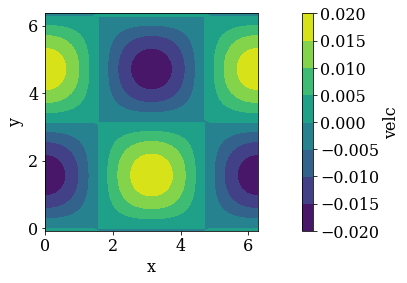

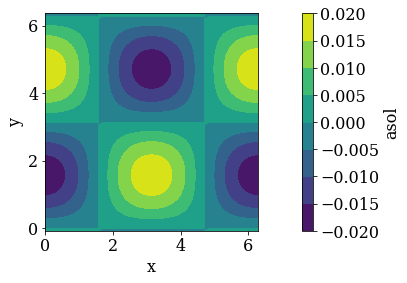

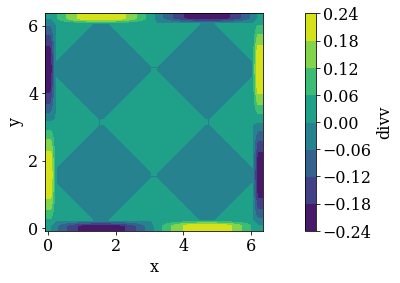

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

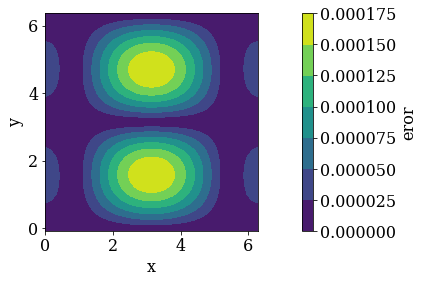

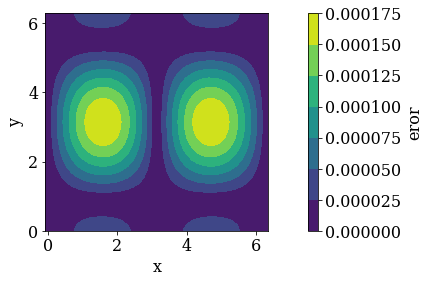

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')

In [10]:
gridx.get_l2_norm('eror')

1.6342781580686344e-06

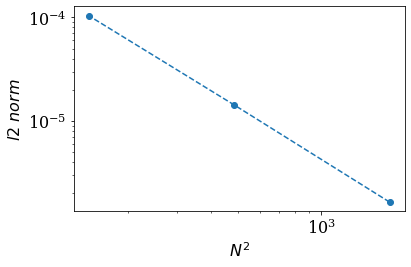

In [19]:
l2 = [1.6440382322243069e-06, 1.4241175674337844e-05, 0.00010385258034981495]
delx = [42*42,22*22,12*12]
from matplotlib import pyplot
pyplot.loglog(delx, l2, color='C0', linestyle='--', marker='o')
pyplot.xlabel('$N^2$', fontsize=16)
pyplot.ylabel('$l2$ $norm$', fontsize=16)
pyplot.tight_layout()
pyplot.savefig('TaylorGreenRk3.png')

In [20]:
slope, intercept = numpy.polyfit(numpy.log(delx), numpy.log(l2), 1)
print(slope)

-1.6548332770140515


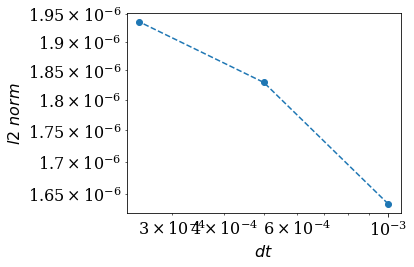

In [21]:
l2 = [1.6342781580686344e-06, 1.8293125467491784e-06, 1.9350943452367563e-06]
delx = [0.001,0.001/2,0.001/4]
from matplotlib import pyplot
pyplot.loglog(delx, l2, color='C0', linestyle='--', marker='o')
pyplot.xlabel('$dt$', fontsize=16)
pyplot.ylabel('$l2$ $norm$', fontsize=16)
pyplot.tight_layout()
pyplot.savefig('TaylorGreenRk3dtCheck.png')

In [17]:
import numpy
slope, intercept = numpy.polyfit(numpy.log(delx), numpy.log(l2), 1)
print(slope)

-0.12187517596097881


In [15]:
scalars.variable['dt']*4

0.004